In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [60]:
train = pd.read_csv('data/train_data.csv', ';')

In [61]:
train.head()

,Id_Записи,Id_Пациента,Возраст,Диагноз,Жалобы,Источник_рекламы,Клиника,Код_диагноза,Пол,Услуга
0,0,115819,54,Гипертензивная болезнь сердца [гипертоническая...,"на повышение ад утром до 140/90 мм.рт.ст., пер...",Другое,5,I11,2,"Прием врача-кардиолога повторный, амбулаторный"
1,1,399973,32,Доброкачественное новообразование молочной железы,На наличие опухоли в левой молочной железе,Другое,3,D24,2,"Прием врача-онколога (маммолога), повторный, а..."
2,2,427563,72,Простой хронический бронхит,Активных жалоб нет.,Интернет,6,J41.0,2,Прием первичный врача-пульмонолога
3,3,257197,55,Другая дорсалгия,"на сохраняющиеся боли в спине и пояснице, сков...",Другое,3,M54.8,1,"Прием врача-невролога повторный, амбулаторный"
4,4,281066,28,Острый фарингит,"на дискомфорт в горле, слабое першение, слабость",Другое,3,J02,2,"Прием врача-оториноларинголога повторный, амбу..."


In [65]:
def get_most_popular_diagnoses(data, percent=95):
    diagnoses = list(np.sort(np.unique(data['Код_диагноза'])))
    diag_to_num = dict(zip(diagnoses, range(len(diagnoses))))
    num_to_diag = dict(zip(range(len(diagnoses)), diagnoses))
    
    data = data.copy()
    data['diag_idx'] = data['Код_диагноза'].apply(lambda code: diag_to_num[code])
    diag_idxs, counts = np.unique(data['diag_idx'], return_counts=True)
    sorted_idxs = np.argsort(counts)[::-1]
    
    popular_idxs = diag_idxs[counts >= np.percentile(counts, q=percent)]
    popular_diagnoses = list(map(lambda idx: num_to_diag[idx], popular_idxs))
    
    return popular_diagnoses

In [72]:
popular_diagnsoes = get_most_popular_diagnoses(train, 95)
print(popular_diagnoses)
print('Count: {}'.format(len(popular_diagnoses)))

['B07', 'B37.3+', 'D23', 'D23.9', 'D25', 'E03.8', 'E04.1', 'E04.2', 'E06.3', 'E11', 'E28', 'E66.0', 'F45.3', 'G44.2', 'G90', 'G90.8', 'H35.0', 'H52.1', 'H52.2', 'H60', 'H61.2', 'I10', 'I11', 'I11.9', 'I20.8', 'I34.1', 'I67.2', 'I67.8', 'I83.9', 'J00', 'J01.0', 'J04.1', 'J06.9', 'J18', 'J20.9', 'J30', 'J30.3', 'J31.0', 'J31.1', 'J31.2', 'J35.0', 'J35.8', 'K21', 'K21.0', 'K29.3', 'K29.5', 'K29.9', 'K30', 'K52.9', 'K58', 'K83.9', 'K86.1', 'K87*', 'L02.2', 'L02.4', 'L08.0', 'L20', 'L21', 'L30.2', 'L30.8', 'L70.0', 'L71.0', 'M15-M19', 'M15.8', 'M21.4', 'M23.2', 'M41', 'M42', 'M42.1', 'M43.9', 'M47', 'M51', 'M51.1', 'M51.2', 'M51.3', 'M51.8', 'M53.0', 'M53.1', 'M53.8', 'M53.9', 'M54', 'M54.2', 'M54.4', 'M54.5', 'M54.6', 'M54.8', 'M54.9', 'M65', 'M79.1', 'M79.6', 'N20.0', 'N30.0', 'N30.2', 'N40', 'N41.1', 'N48.1', 'N60.1', 'N72', 'N76.0', 'N76.1', 'N77.1*', 'N80.0', 'N83.0', 'N84.0', 'N86', 'N95.2', 'Z00', 'Z00.0', 'Z00.8', 'Z01', 'Z01.4', 'Z01.8', 'Z32.1', 'Z34.0', 'Z34.8', 'Z35.8']
Count: 1

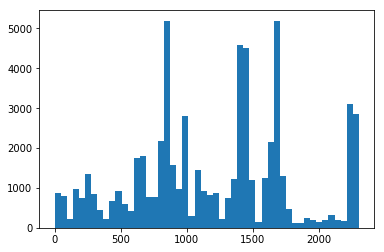

In [29]:
plt.hist(train['diag_idx'], bins=50);